 # Problem Statement:
 This data is about the amount spent on advertising  through different channels like Tv,Radio,Newspaper .The goal is to predict
 how the expenses affect the sales and is there a way to optimise that sale?

In [88]:
#Necessary imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## Loading the dataset

In [14]:
df = pd.read_csv("Advertisingdata.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [15]:
# identifyng the rows and columns
df.shape

(200, 5)

In [16]:
# setting for maxrows
pd.set_option('display.max_rows',None)

In [17]:
# information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [18]:
# details of all column names
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [36]:
# finding the null values
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There are no null values

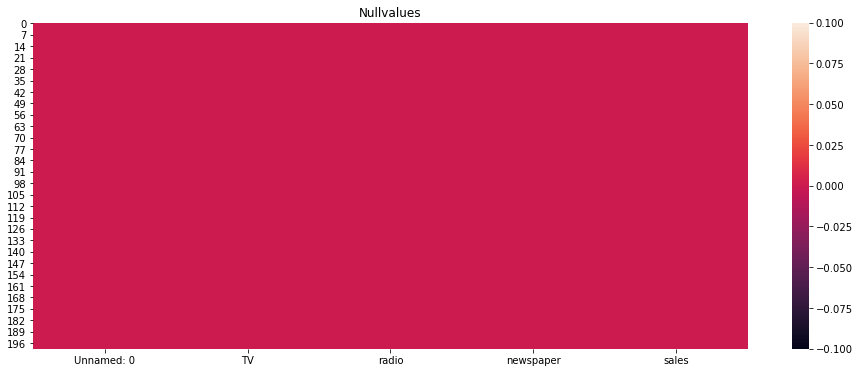

In [37]:
# showing the null values using heatmap
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Nullvalues")
plt.show()

In [38]:
#describing the data 
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Describing the data with heatmap

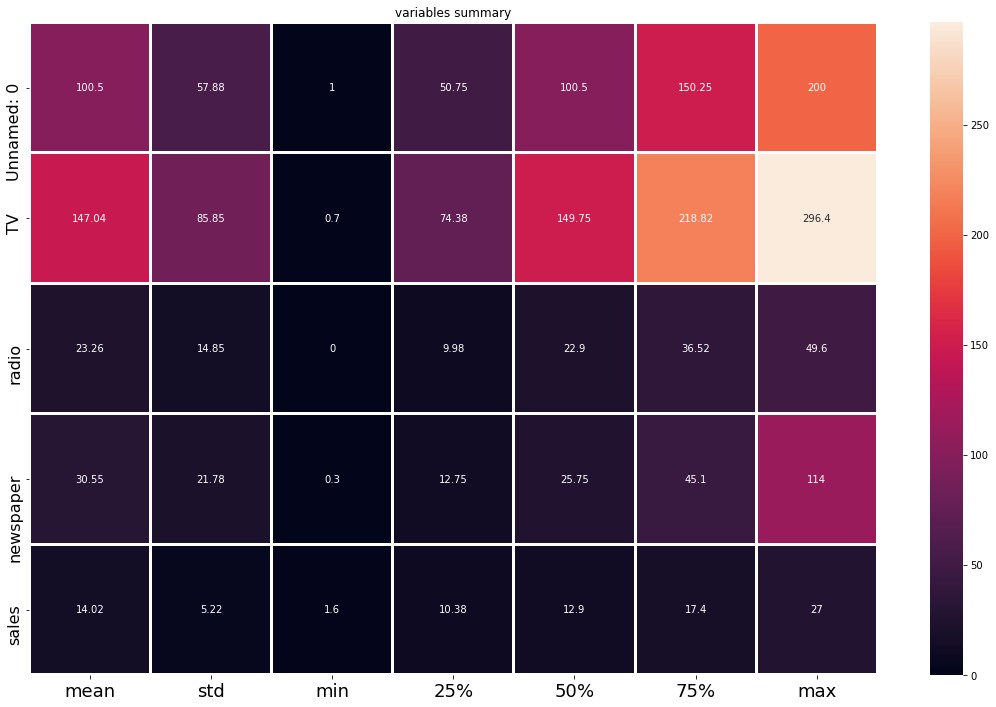

In [39]:
plt.figure(figsize = (19, 12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2, annot = True,fmt="g")
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title("variables summary")
plt.show()

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

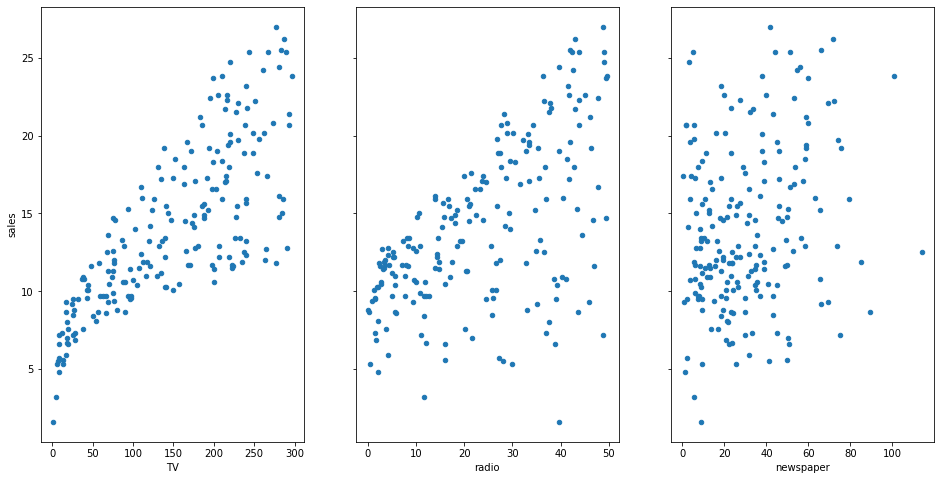

In [44]:
# visualisatjion of sales with  tv,radio,newspaper
fig,axs  = plt.subplots(1,3,sharey = True)
df.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])


In [45]:
# correlation matrix
df.corr()


,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

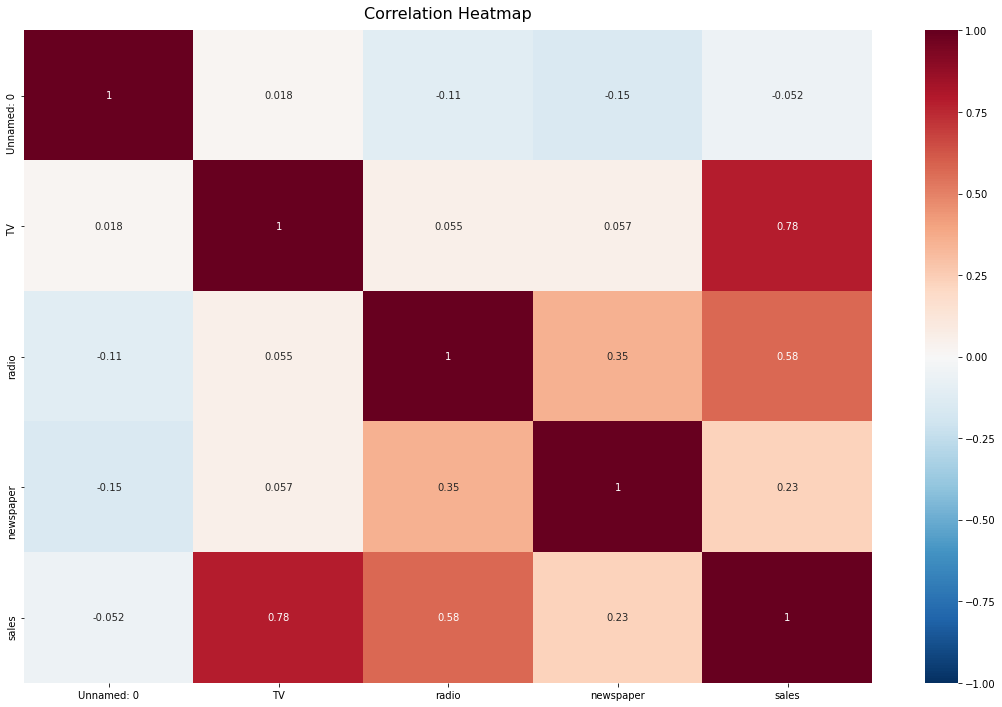

In [47]:
# visualisatjion of data with correlation matrix
plt.figure(figsize = (19, 12))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap='RdBu_r', annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 16}, pad = 12)

from the observation tvand radio are highly correlated

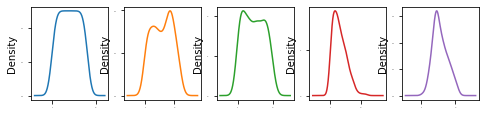

In [51]:
# density plot
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

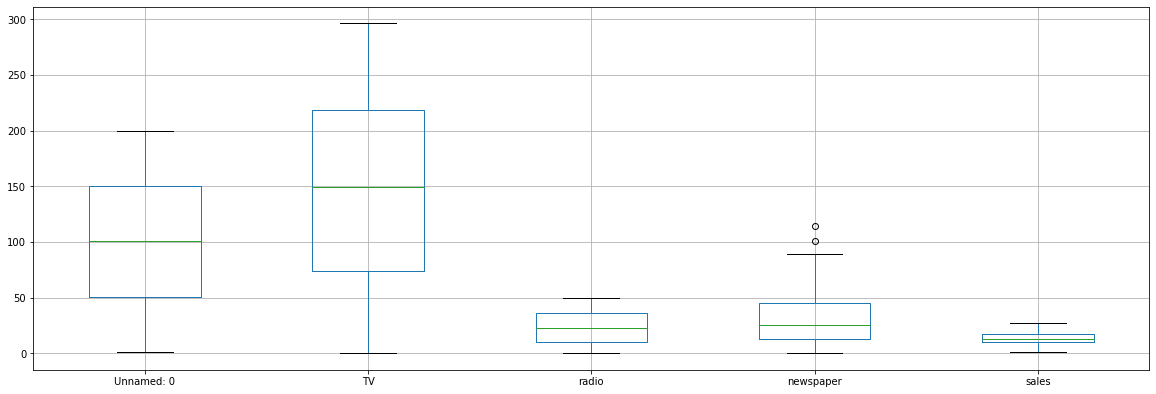

In [54]:
# boxplot
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

There are few outliers present inthe newspaper

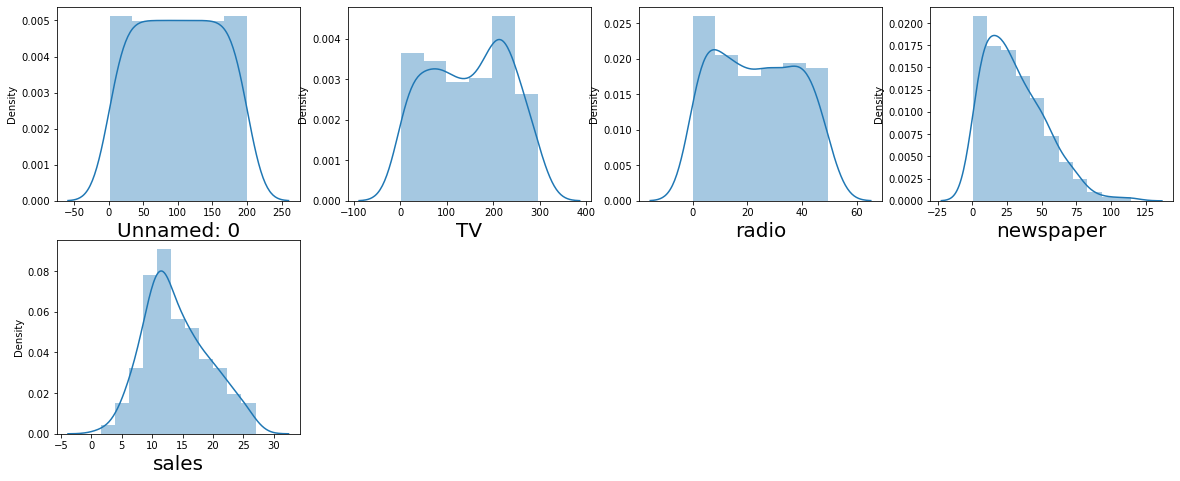

In [55]:
#Distribution plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1
for column in df:
    if plotnumber <=24:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.show()     

In [68]:
# Removing the outliers with zscore
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
print(z)

[[1.73103384e+00 9.78697339e-01 9.89521352e-01 1.93299778e+00
  1.56651666e+00]
 [1.71370862e+00 1.19901165e+00 1.09070498e+00 7.51312752e-01
  6.90881010e-01]
 [1.69638341e+00 1.51933199e+00 1.53591293e+00 1.93790103e+00
  9.03114978e-01]
 [1.67905820e+00 5.64563564e-02 1.22561648e+00 1.40834924e+00
  8.71932761e-01]
 [1.66173298e+00 4.00243389e-01 8.31783915e-01 1.40344598e+00
  2.08531080e-01]
 [1.64440777e+00 1.61906543e+00 1.73828018e+00 2.21738670e+00
  1.30828892e+00]
 [1.62708256e+00 1.04647815e+00 6.52242599e-01 3.07790837e-01
  4.20765049e-01]
 [1.60975734e+00 3.10797368e-01 2.38173309e-01 8.91278462e-01
  1.50649089e-01]
 [1.59243213e+00 1.62023876e+00 1.41864895e+00 1.41102374e+00
  1.77134485e+00]
 [1.57510692e+00 6.23176960e-01 1.38492107e+00 4.20565756e-01
  6.52293015e-01]
 [1.55778170e+00 9.45571378e-01 1.16906267e+00 2.73468035e-01
  1.03817296e+00]
 [1.54045649e+00 7.98003813e-01 5.86319933e-02 1.26392602e+00
  6.59698792e-01]
 [1.52313127e+00 1.44189191e+00 8.073908

In [69]:
print('Row numbers   \n',np.where(z>3)[0])
print('\n\n column numbers\n',np.where(z>3)[1] )

Row numbers   
 []


 column numbers
 []


In [70]:
index = (np.where(z>3)[0])

In [71]:
df = df.drop(df.index[index])
df.shape

(198, 5)

In [72]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Separating the features and labels

In [73]:
x=df.drop('sales',axis=1)
y=df["sales"]

In [74]:
x

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
5,6,8.7,48.9,75.0
6,7,57.5,32.8,23.5
7,8,120.2,19.6,11.6
8,9,8.6,2.1,1.0
9,10,199.8,2.6,21.2


In [75]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
5       7.2
6      11.8
7      13.2
8       4.8
9      10.6
10      8.6
11     17.4
12      9.2
13      9.7
14     19.0
15     22.4
17     24.4
18     11.3
19     14.6
20     18.0
21     12.5
22      5.6
23     15.5
24      9.7
25     12.0
26     15.0
27     15.9
28     18.9
29     10.5
30     21.4
31     11.9
32      9.6
33     17.4
34      9.5
35     12.8
36     25.4
37     14.7
38     10.1
39     21.5
40     16.6
41     17.1
42     20.7
43     12.9
44      8.5
45     14.9
46     10.6
47     23.2
48     14.8
49      9.7
50     11.4
51     10.7
52     22.6
53     21.2
54     20.2
55     23.7
56      5.5
57     13.2
58     23.8
59     18.4
60      8.1
61     24.2
62     15.7
63     14.0
64     18.0
65      9.3
66      9.5
67     13.4
68     18.9
69     22.3
70     18.3
71     12.4
72      8.8
73     11.0
74     17.0
75      8.7
76      6.9
77     14.2
78      5.3
79     11.0
80     11.8
81     12.3
82     11.3
83     13.6
84  

In [76]:
# checking the skewness of the data
df.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper     0.650112
sales         0.407130
dtype: float64

### Removing the skewness with powertransform

In [77]:
# importing power transform
from sklearn.preprocessing import power_transform
df_new = power_transform(x)
df_new = pd.DataFrame(df_new,columns=x.columns)

In [78]:
df_new.skew()

Unnamed: 0   -0.269331
TV           -0.320682
radio        -0.236668
newspaper    -0.101288
dtype: float64

In [86]:
#data scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [90]:
x_scaled

array([[-1.73103384e+00,  9.78697339e-01,  9.89521352e-01,
         1.93299778e+00],
       [-1.71370862e+00, -1.19901165e+00,  1.09070498e+00,
         7.51312752e-01],
       [-1.69638341e+00, -1.51933199e+00,  1.53591293e+00,
         1.93790103e+00],
       [-1.67905820e+00,  5.64563564e-02,  1.22561648e+00,
         1.40834924e+00],
       [-1.66173298e+00,  4.00243389e-01, -8.31783915e-01,
         1.40344598e+00],
       [-1.64440777e+00, -1.61906543e+00,  1.73828018e+00,
         2.21738670e+00],
       [-1.62708256e+00, -1.04647815e+00,  6.52242599e-01,
        -3.07790837e-01],
       [-1.60975734e+00, -3.10797368e-01, -2.38173309e-01,
        -8.91278462e-01],
       [-1.59243213e+00, -1.62023876e+00, -1.41864895e+00,
        -1.41102374e+00],
       [-1.57510692e+00,  6.23176960e-01, -1.38492107e+00,
        -4.20565756e-01],
       [-1.55778170e+00, -9.45571378e-01, -1.16906267e+00,
        -2.73468035e-01],
       [-1.54045649e+00,  7.98003813e-01,  5.86319933e-02,
      

In [91]:
#splitting the data 
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=340)
y_train.head()

181    12.2
196     9.7
131    12.7
82     11.3
49      9.7
Name: sales, dtype: float64

# Linear Regression model training

In [92]:
# model instantiating and training
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [93]:
df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [94]:
#adjuasted r*2
regression.score(x_train,y_train)


0.8799259405677803

In [95]:
regression.score(x_test,y_test)

0.9260080645695014

In [97]:
y_pred = regression.predict(x_test)

In [98]:
y_pred

array([14.45468443, 16.91984831, 18.54949251, 23.88199511, 21.07115771,
       10.28884877,  9.71123403,  5.96734142, 20.24245006, 22.69091528,
       13.61775711, 17.85785021,  3.43848582, 14.65657607,  4.34287665,
        7.80993942, 10.35577923,  9.52919371, 24.68176957, 16.21539485,
       16.29828628, 10.82972789,  6.94926577, 20.79798694,  6.411275  ,
        9.78616405,  6.27516396,  9.84908393, 14.87577786, 15.39573422,
       14.16272576, 19.15951606, 10.46740576, 12.39393785, 18.3964829 ,
       16.89415773, 21.10839481, 13.77544373,  6.45390213,  7.43795625,
       14.07891668, 12.68483601,  6.87353415,  9.60896029, 17.25618087,
       17.62307458, 18.57910294, 20.32928394, 12.52945912, 23.93249945])

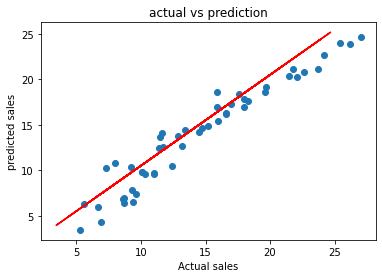

In [99]:
plt.scatter(y_test,y_pred)
m, c = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred, (m * y_pred + c), color = 'r')
plt.xlabel('Actual sales')
plt.ylabel('predicted sales')
plt.title('actual vs prediction')
plt.show()

In [100]:
print('Coefficient:', regression.score(x_train, y_train))
print('Intercept:', regression.intercept_)
print('Slope:', regression.coef_)

Coefficient: 0.8799259405677803
Intercept: 13.857059733556673
Slope: [ 0.01209813  3.87844776  2.84529538 -0.10603966]


In [101]:
# model evaluation techniques
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [102]:
y_pred = regression.predict(x_test)

In [103]:
mean_absolute_error(y_test,y_pred)

1.3190691838226711

In [104]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.562083879510631

In [105]:
#Regularization with lasso
from sklearn.linear_model import LassoCV,Lasso

In [106]:
lasscv = LassoCV(alphas = None,max_iter=1000, normalize=True)

In [107]:
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [108]:
#learning rate
alpha = lasscv.alpha_
alpha

0.005431640390047465

In [110]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.005431640390047465)

In [111]:
linearlasso=lasso_reg.score(x_test,y_test)

In [112]:
linearlasso*100

92.62398160614231

# Random forest regressor

In [113]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [114]:
y_pred = rf.predict(x_train)
print("R square score",metrics.r2_score(y_train,y_pred)*100)

R square score 99.45002183818526


In [115]:
y_test_pred = rf.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print("R square score",accuracy*100)

R square score 98.13277451634423


# Adaboost Model training

In [116]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train,y_train)


AdaBoostRegressor()

In [117]:
y_pred = ada.predict(x_train)
print("R square score",metrics.r2_score(y_train,y_pred))

R square score 0.9720206812850444


In [118]:
y_test_pred = ada.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print("R square score",accuracy*100)

R square score 94.67104950974131


# Gradient boosting regressor

In [119]:
from sklearn.ensemble import GradientBoostingRegressor

gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)


GradientBoostingRegressor()

In [120]:
y_pred = gbr.predict(x_train)
print("R square score",metrics.r2_score(y_train,y_pred))

R square score 0.9987008337492006


In [121]:
y_test_pred = gbr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print("R square score",accuracy*100)

R square score 98.72188815093506


# xgb model

In [122]:
from xgboost import XGBRegressor
#import xgboost as xgb
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [123]:
y_pred = xgb.predict(x_train)
print("R square score",metrics.r2_score(y_train,y_pred)*100)

R square score 99.99999409821389


In [124]:
y_test_pred = xgb.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print("R square score",accuracy*100)

R square score 98.3555967751654


# cross validation

In [125]:
from sklearn.model_selection import cross_val_score

In [126]:
scr=cross_val_score(regression,x,y,cv=5)
print("cross validation for linear regression is",scr.mean()*100)

cross validation for linear regression is 88.27160786305974


In [128]:
scr=cross_val_score(rf,x,y,cv=5)
print("cross validation for random forest regressor is",scr.mean()*100)

cross validation for random forest regressor is 97.33088640834613


In [130]:
scr=cross_val_score(xgb,x,y,cv=10)
print("cross validation for xgboost regressor is",scr.mean()*100)

cross validation for xgboost regressor is 97.35252410918864


In [131]:
scr=cross_val_score(ada,x,y,cv=5)
print("cross validation for Ada boost regressor is",scr.mean()*100)

cross validation for Ada boost regressor is 95.57565428387898


In [132]:
scr=cross_val_score(gbr,x,y,cv=5)
print("cross validation for Gradient boost regressor is",scr.mean()*100)

cross validation for Gradient boost regressor is 97.80410053550874


### By observing crossvalidation scores with different models Randomforest model shows least difference 

#  Hyperparameter tuning using Gridsearch

In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
grid_params={'max_depth': [80, 90, 100, 110],
             'min_samples_split': [8, 10, 12],
             'n_estimators': [100, 200, 300, 1000]}

In [135]:
grd_src15=GridSearchCV(rf,param_grid=grid_params,cv=3)
grd_src15.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [80, 90, 100, 110],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [136]:
grd_src15.best_estimator_

RandomForestRegressor(max_depth=100, min_samples_split=8)

In [137]:
rfr=  RandomForestRegressor(max_depth=100, min_samples_split=8)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
print('*********accuracy post tuning********')
print(metrics.r2_score(y_test,y_pred)*100)

*********accuracy post tuning********
97.51693099821065


# randomforest model accuracy is 97.51693099821065

## saving the model

In [140]:
import joblib
joblib.dump(rf,'Advertisingsales.pkl')

['Advertisingsales.pkl']